In [1]:
library(data.table) 
library(ggplot2)
library(dplyr)
library(e1071)
library(rpart)
library(caret)
library(tidyverse)
library(ggplot2)
library(stringr)
library(ISLR)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'e1071' was built under R version 3.4.3"Loading required package: lattice
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
lift():      purrr, caret
transpose(): purrr, data.table
Warning message:
"package 'ISLR' was built under R version 3.4.3"

In [2]:
colorstats <- read.csv('Stats.csv')
colorstats %>%
  select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, People, Percentage.Cyan, Number.of.Likes) ->stat
stat %>%
 select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, Percentage.Cyan) ->sorted
cbind(sorted, t(apply(sorted, 1, sort, decreasing = TRUE))) -> sorted1
colnames(sorted1) <- c("Percentage.Black", "Percentage.White", "Percentage.Blue", "Percentage.Red", "Percentage.Yellow",
                     "Percentage.Green","Percentage.Purple","Percentage.Cyan", "Color1", "Color2", "Color3",
                     "Color4", "Color5", "Color6", "Color7", "Color8")
sorted1 %>%
 select(Color1, Color2, Color3, Color4, Color5, Color6, Color7, Color8) ->domcolor
domcolor$Likes <- stat$Number.of.Likes
dompcolor <- domcolor
dompcolor$People <- stat$People

In [4]:
#domcolor 1st
library(leaps)
regfit.full=regsubsets(Likes∼.,domcolor)
summary(regfit.full)

Warning message:
"package 'leaps' was built under R version 3.4.4"

Subset selection object
Call: regsubsets.formula(Likes ~ ., domcolor)
8 Variables  (and intercept)
       Forced in Forced out
Color1     FALSE      FALSE
Color2     FALSE      FALSE
Color3     FALSE      FALSE
Color4     FALSE      FALSE
Color5     FALSE      FALSE
Color6     FALSE      FALSE
Color7     FALSE      FALSE
Color8     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         Color1 Color2 Color3 Color4 Color5 Color6 Color7 Color8
1  ( 1 ) " "    " "    " "    " "    "*"    " "    " "    " "   
2  ( 1 ) " "    " "    " "    " "    "*"    "*"    " "    " "   
3  ( 1 ) " "    " "    " "    " "    "*"    "*"    "*"    " "   
4  ( 1 ) " "    " "    " "    "*"    "*"    "*"    "*"    " "   
5  ( 1 ) " "    " "    " "    "*"    "*"    "*"    "*"    "*"   
6  ( 1 ) " "    " "    "*"    "*"    "*"    "*"    "*"    "*"   
7  ( 1 ) "*"    "*"    "*"    "*"    "*"    "*"    " "    "*"   
8  ( 1 ) "*"    "*"    "*"    "*"    "*"    "*"    "*"    "*"   

In [5]:
regfit.full=regsubsets(Likes∼.,data=domcolor ,nvmax=19)
reg.summary =summary (regfit.full)
 reg.summary$rsq

[1] 0.000583043 0.001944202 0.002919786 0.003662135 0.004358506 0.004404201
[7] 0.004440183 0.006187750

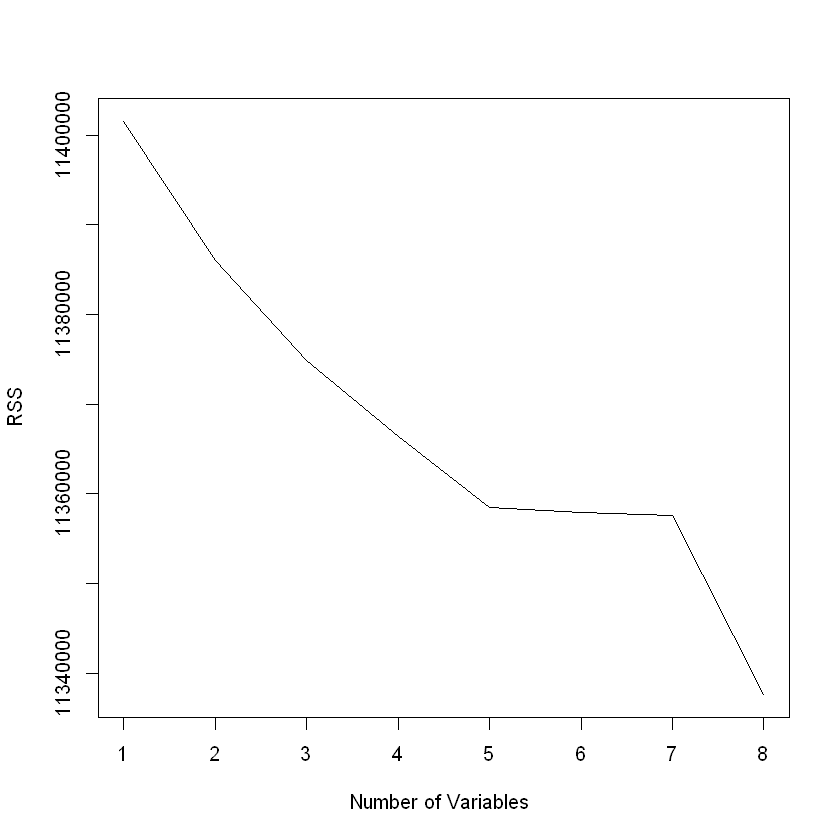

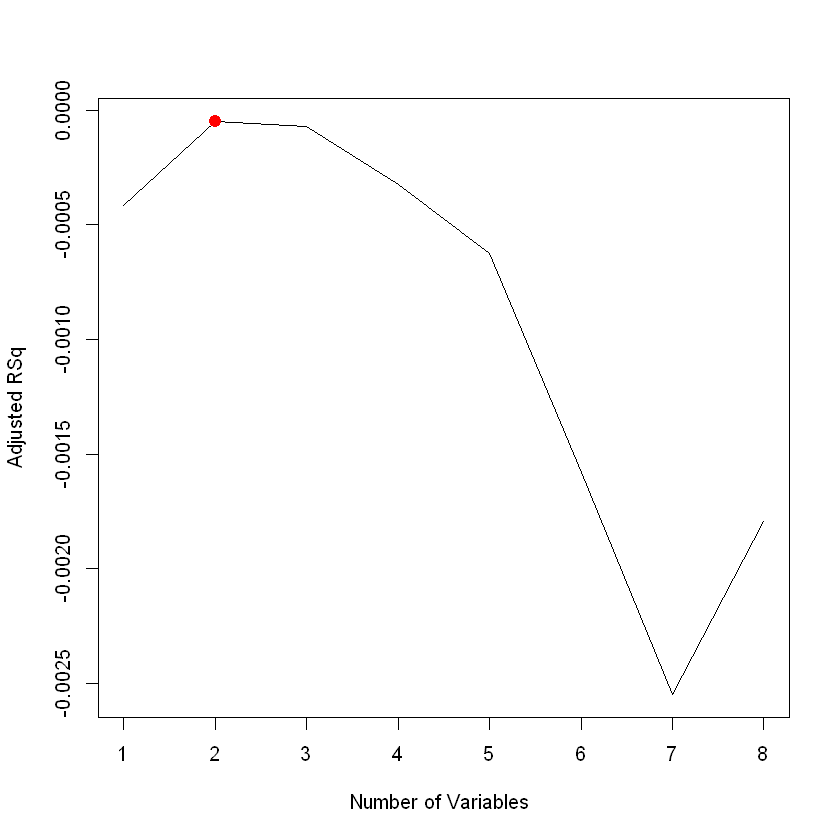

In [6]:
 plot(reg.summary$rss ,xlab="Number of Variables ",ylab="RSS",type="l")
 plot(reg.summary$adjr2 ,xlab="Number of Variables ",ylab="Adjusted RSq",type="l")
points(2,reg.summary$adjr2[2],col="red",cex=2,pch=20)

In [7]:
which.max(reg.summary$adjr2)
a <- which.max(reg.summary$adjr2) 

[1] 2

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


[1] 1

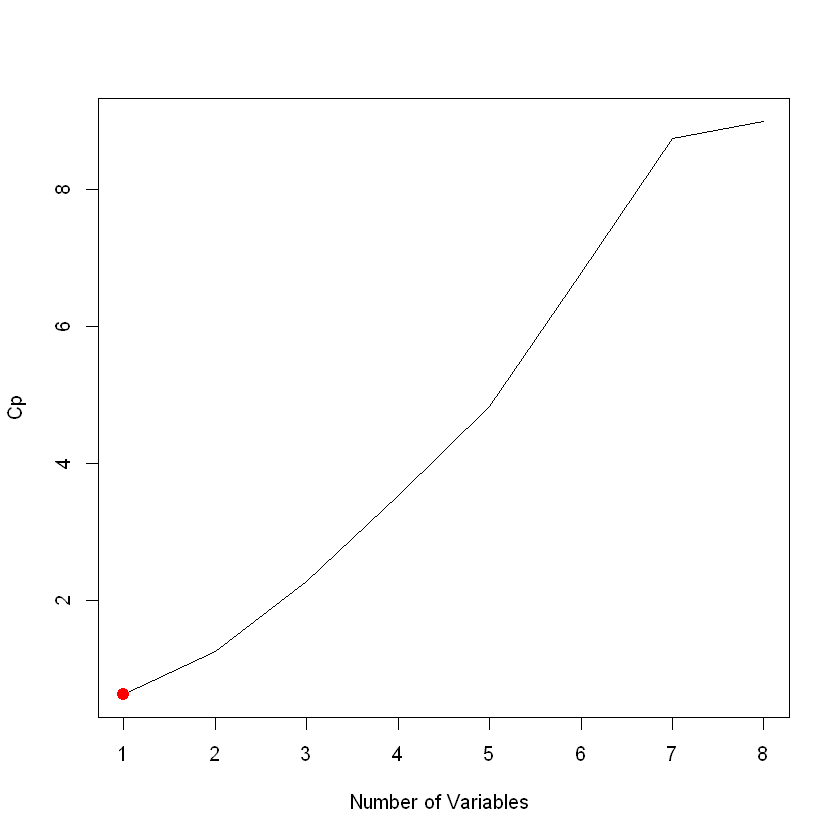

In [8]:
plot(reg.summary$cp ,xlab="Number of Variables ",ylab="Cp",type='l')

which.min(reg.summary$cp)
b <- which.min(reg.summary$cp)
points (1,reg.summary$cp[1], col ="red",cex=2,pch=20)

In [9]:

which.min(reg.summary$bic)
c <- which.min(reg.summary$bic)


[1] 1

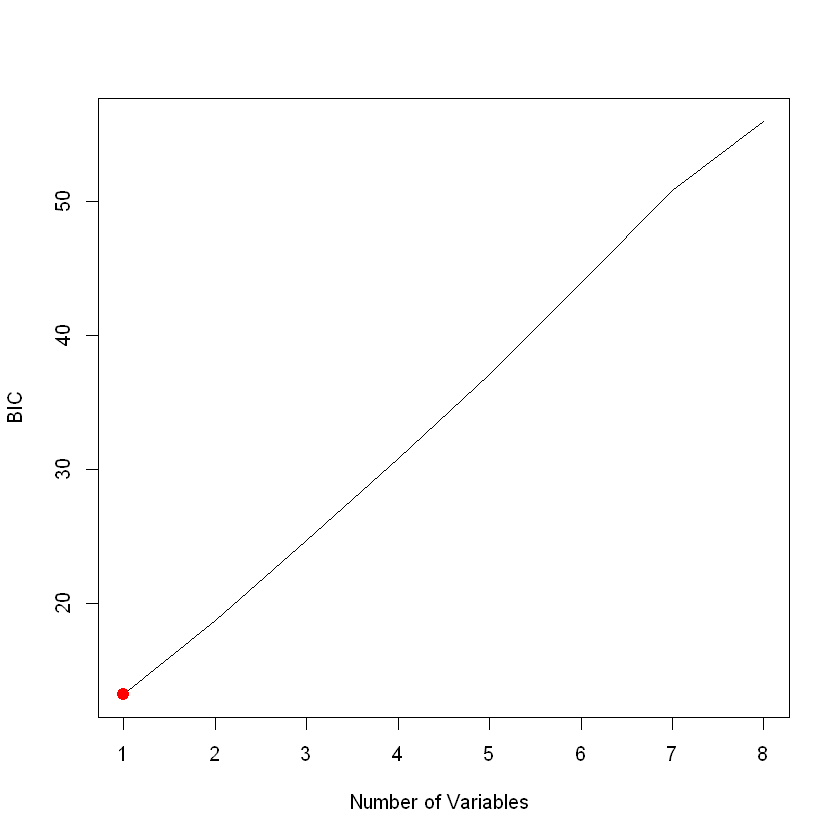

In [10]:
plot(reg.summary$bic,xlab="Number of Variables ",ylab="BIC",type="l")
points (1,reg.summary$bic[1],col="red",cex=2,pch =20)

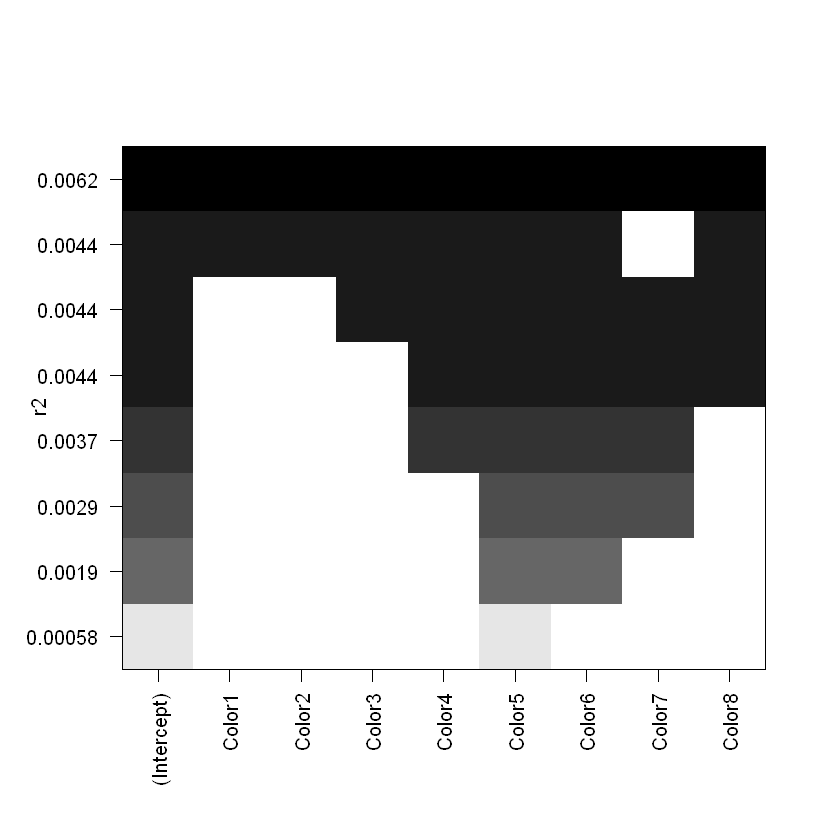

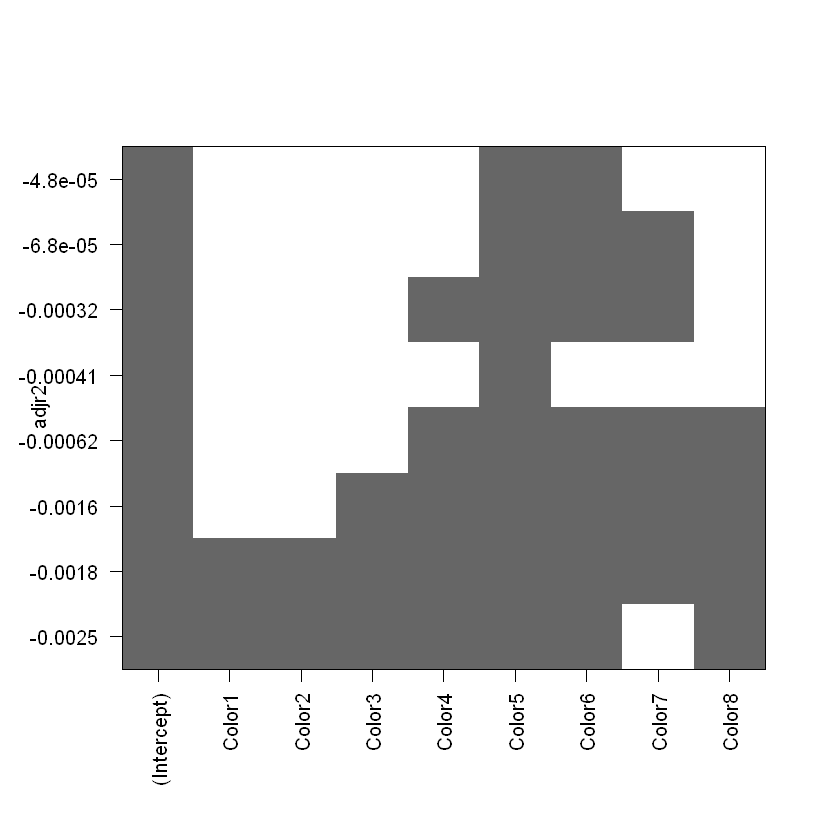

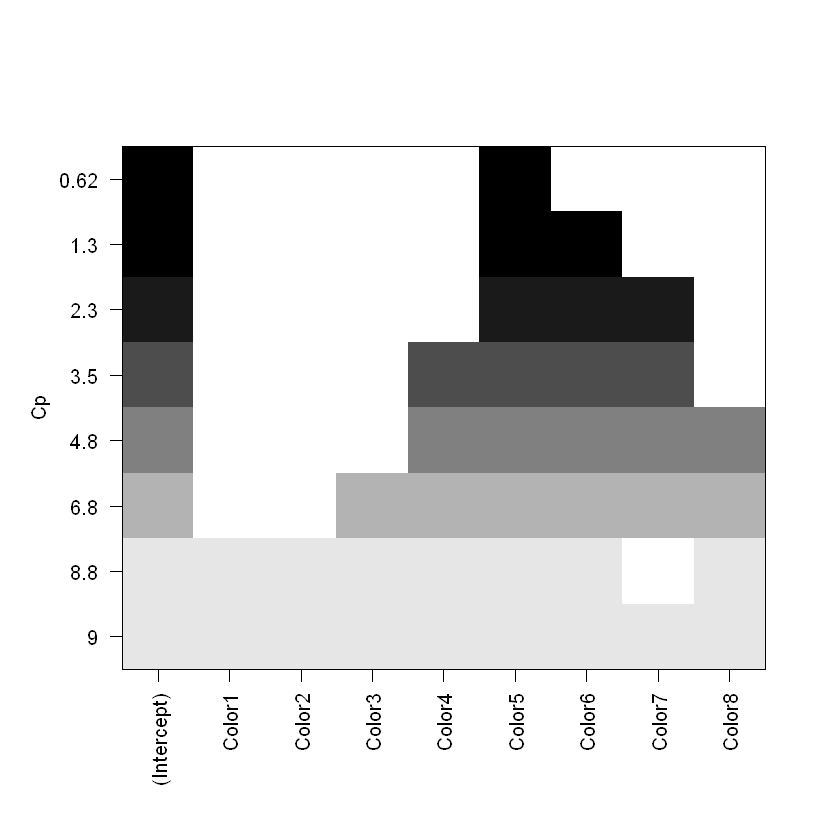

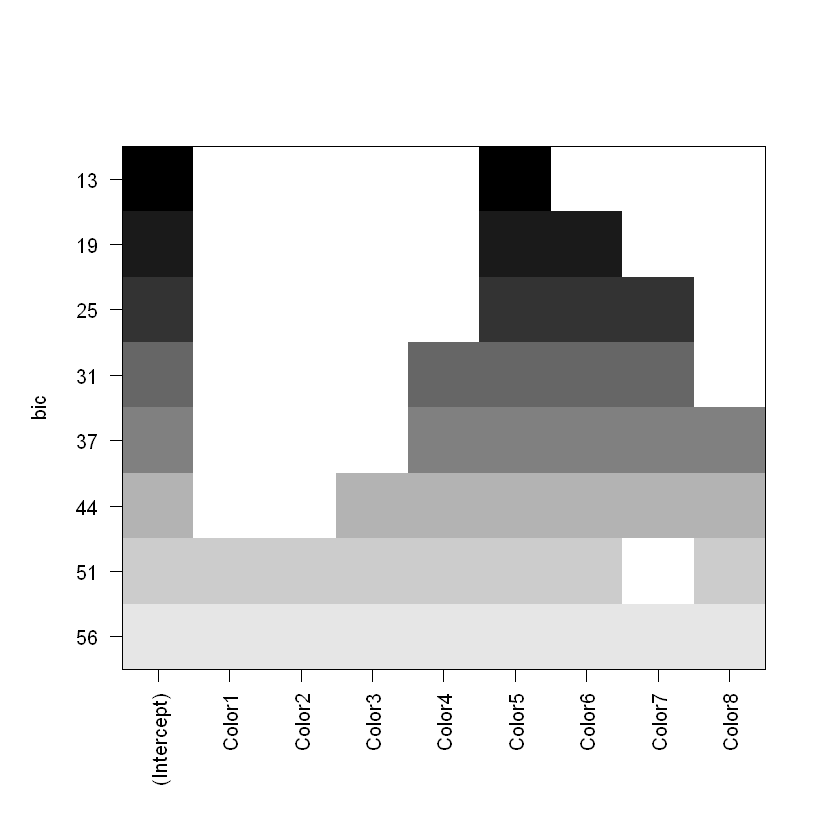

In [18]:
plot(regfit.full ,scale="r2")
plot(regfit.full ,scale="adjr2")
plot(regfit.full ,scale="Cp")
plot(regfit.full ,scale="bic")

In [11]:
coef(regfit.full,1)
#a, b, and c are values/numbers, so if it doesn't work, try replacing with
#numbers

(Intercept)      Color5 
   38.07554   156.50633

In [12]:
regfit.fwd=regsubsets (Likes∼.,data=domcolor, nvmax=19, method ="forward")
summary(regfit.fwd)


Subset selection object
Call: regsubsets.formula(Likes ~ ., data = domcolor, nvmax = 19, method = "forward")
8 Variables  (and intercept)
       Forced in Forced out
Color1     FALSE      FALSE
Color2     FALSE      FALSE
Color3     FALSE      FALSE
Color4     FALSE      FALSE
Color5     FALSE      FALSE
Color6     FALSE      FALSE
Color7     FALSE      FALSE
Color8     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         Color1 Color2 Color3 Color4 Color5 Color6 Color7 Color8
1  ( 1 ) " "    " "    " "    " "    "*"    " "    " "    " "   
2  ( 1 ) " "    " "    " "    " "    "*"    "*"    " "    " "   
3  ( 1 ) " "    " "    " "    " "    "*"    "*"    "*"    " "   
4  ( 1 ) " "    " "    " "    "*"    "*"    "*"    "*"    " "   
5  ( 1 ) " "    " "    " "    "*"    "*"    "*"    "*"    "*"   
6  ( 1 ) " "    " "    "*"    "*"    "*"    "*"    "*"    "*"   
7  ( 1 ) "*"    " "    "*"    "*"    "*"    "*"    "*"    "*"   
8  ( 1 ) "*"    "*"    "*"    

In [13]:
regfit.bwd=regsubsets(Likes∼.,data=domcolor , nvmax=19, method ="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Likes ~ ., data = domcolor, nvmax = 19, method = "backward")
8 Variables  (and intercept)
       Forced in Forced out
Color1     FALSE      FALSE
Color2     FALSE      FALSE
Color3     FALSE      FALSE
Color4     FALSE      FALSE
Color5     FALSE      FALSE
Color6     FALSE      FALSE
Color7     FALSE      FALSE
Color8     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         Color1 Color2 Color3 Color4 Color5 Color6 Color7 Color8
1  ( 1 ) " "    " "    " "    "*"    " "    " "    " "    " "   
2  ( 1 ) "*"    " "    " "    "*"    " "    " "    " "    " "   
3  ( 1 ) "*"    " "    "*"    "*"    " "    " "    " "    " "   
4  ( 1 ) "*"    "*"    "*"    "*"    " "    " "    " "    " "   
5  ( 1 ) "*"    "*"    "*"    "*"    " "    "*"    " "    " "   
6  ( 1 ) "*"    "*"    "*"    "*"    " "    "*"    " "    "*"   
7  ( 1 ) "*"    "*"    "*"    "*"    "*"    "*"    " "    "*"   
8  ( 1 ) "*"    "*"    "*"  

In [14]:
coef(regfit.full,6)

(Intercept)      Color3      Color4      Color5      Color6      Color7 
   42.17301   -17.06079   -60.67252   425.00241  -962.47502  1566.18536 
     Color8 
-1908.88889

In [15]:
coef(regfit.full,4)

(Intercept)      Color4      Color5      Color6      Color7 
   41.56857   -82.43367   448.89982  -987.82545  1049.88364

In [16]:
coef(regfit.fwd,6)

(Intercept)      Color3      Color4      Color5      Color6      Color7 
   42.17301   -17.06079   -60.67252   425.00241  -962.47502  1566.18536 
     Color8 
-1908.88889

In [17]:
coef(regfit.fwd,4)

(Intercept)      Color4      Color5      Color6      Color7 
   41.56857   -82.43367   448.89982  -987.82545  1049.88364

In [18]:
coef(regfit.bwd,6)
#machinelearning 2-3 (1)(1)

(Intercept)      Color1      Color2      Color3      Color4      Color6 
   573.3192   -531.8994   -525.7392   -552.6222   -603.6196  -1380.4278 
     Color8 
 -1546.4598

In [19]:
coef(regfit.bwd,4)

(Intercept)      Color1      Color2      Color3      Color4 
  126.46697   -85.32623   -82.57348   -96.95486  -137.60744

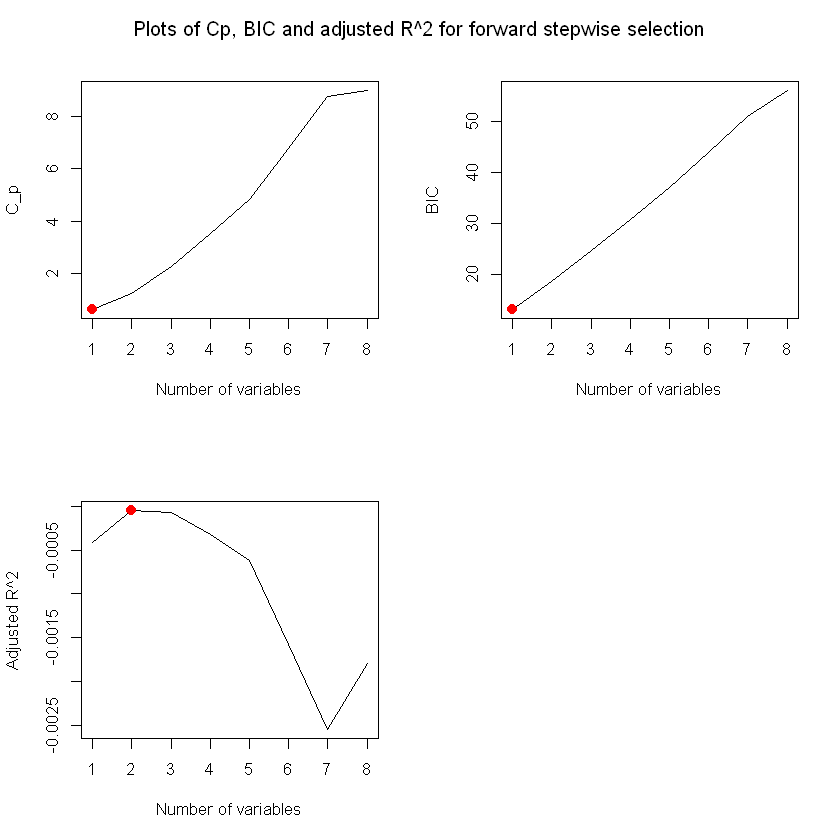

In [20]:
regfit.fwd <- regsubsets(Likes ~ ., data = domcolor, nvmax = 10, method = "forward")
reg.summary.fwd <- summary(regfit.fwd)
par(mfrow = c(2, 2))
plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)
mtext("Plots of Cp, BIC and adjusted R^2 for forward stepwise selection", side = 3, line = -2, outer = TRUE)

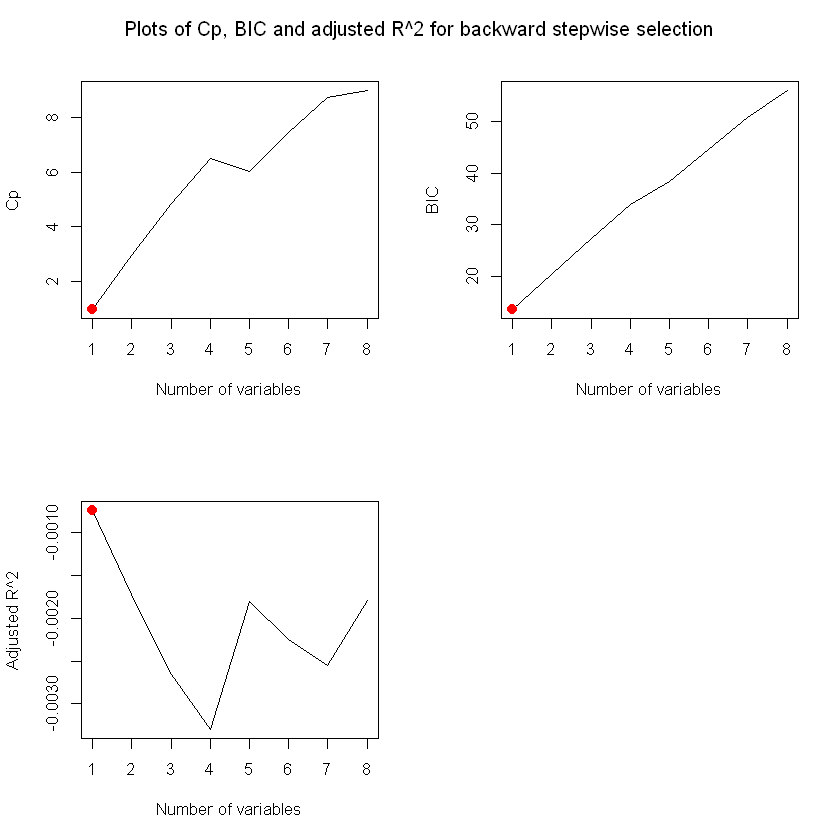

In [21]:
regfit.bwd <- regsubsets(Likes ~ ., data = domcolor, nvmax = 10, method = "backward")
reg.summary.bwd <- summary(regfit.bwd)
par(mfrow = c(2, 2))
plot(reg.summary.bwd$cp, xlab = "Number of variables", ylab = "Cp", type = "l")
points(which.min(reg.summary.bwd$cp), reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.bwd$bic), reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.bwd$adjr2), reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)], col = "red", cex = 2, pch = 20)
mtext("Plots of Cp, BIC and adjusted R^2 for backward stepwise selection", side = 3, line = -2, outer = TRUE)

In [8]:
library(glmnet)
dat.mat=model.matrix(Likes~.,data=domcolor)[,-1]
y = domcolor$Likes
grid =10^ seq (10,-2, length =100)
ridge.mod =glmnet(dat.mat,y,alpha =0, lambda =grid)
sqrt(sum(coef(ridge.mod)[ -1 ,50]^2) )


[1] 8.459955

In [9]:
sqrt(sum(coef(ridge.mod)[ -1 ,60]^2) )

[1] 132.6286

In [13]:
predict(ridge.mod,s=50, type ="coefficients")[1:9 ,]

(Intercept)       Color1       Color2       Color3       Color4       Color5 
  40.3096586    0.9947383    2.3787072  -12.9673520  -31.6961871  166.9638611 
      Color6       Color7       Color8 
-277.6610872  604.5049691 -896.4709295

In [22]:
set.seed (1)
train=sample(1:nrow(dat.mat), nrow(dat.mat)/2)
test=(-train)
y.test=y[test]

In [23]:
ridge.mod =glmnet(dat.mat[train,] , y[train], alpha=0, lambda=grid, thresh= 1e-12)
ridge.pred=predict(ridge.mod ,s=4, newx=dat.mat[test,])
mean((ridge.pred-y.test)^2)

[1] 9270.628

In [24]:
mean(( mean(y[train ])-y.test)^2)

[1] 9127.549

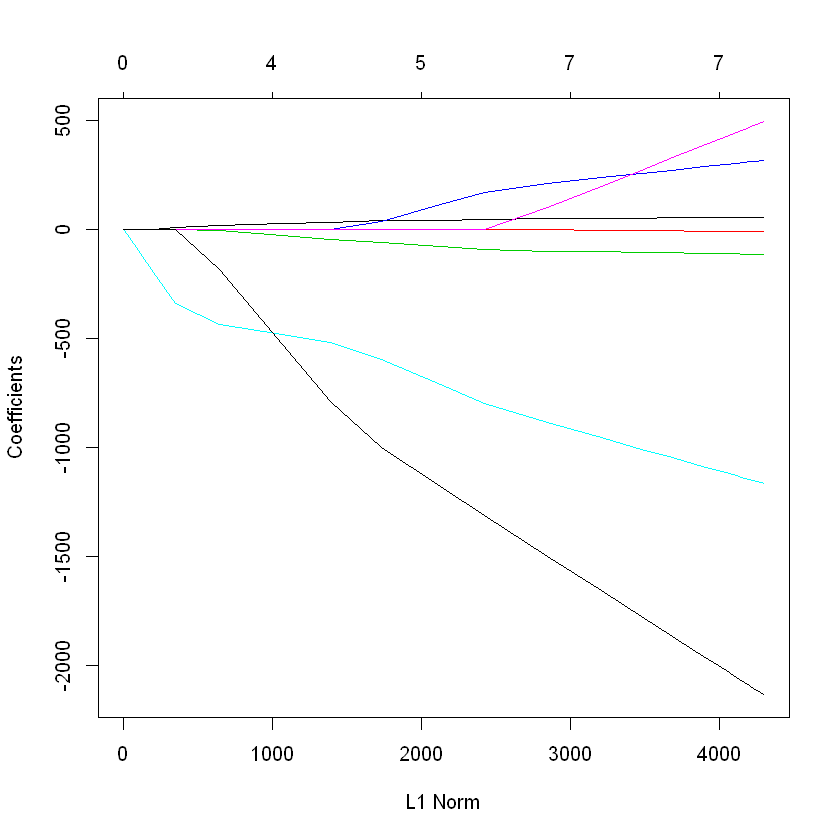

In [25]:
lasso.mod =glmnet(dat.mat[train ,],y[train],alpha =1, lambda=grid)
plot(lasso.mod)


[1] 9129.377

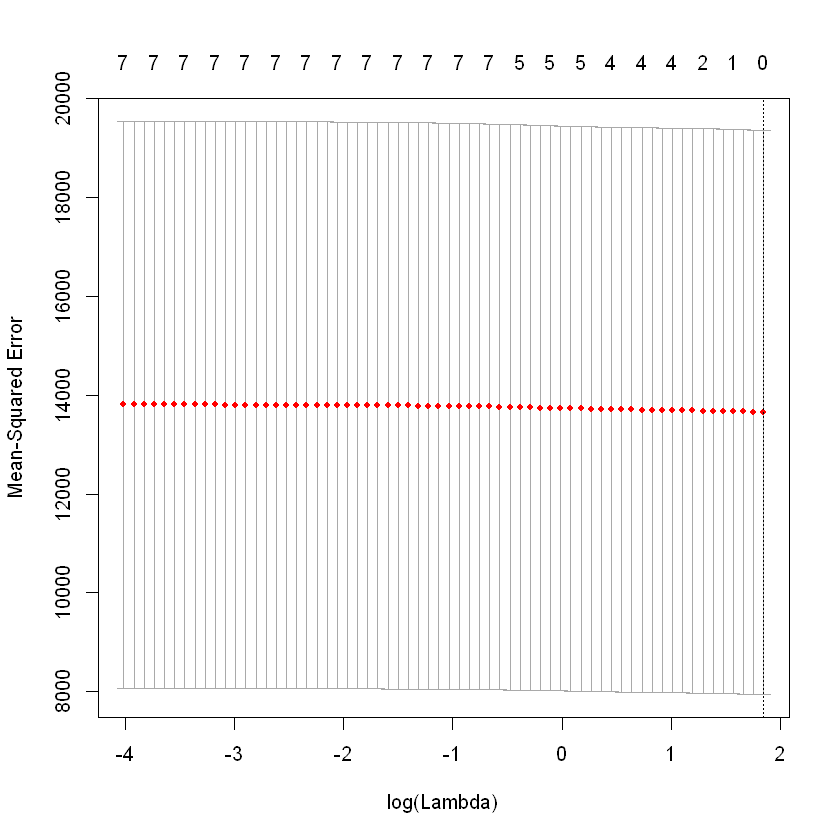

In [29]:
set.seed (1)
cv.out =cv.glmnet(dat.mat[train ,],y[train],alpha=1)
plot(cv.out)
bestlam =cv.out$lambda.min
lasso.pred=predict(lasso.mod ,s=bestlam ,newx=dat.mat[test,])
mean((lasso.pred-y.test)^2)


In [30]:
cv.out=cv.glmnet(dat.mat,domcolor,alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam

lasso.mod=glmnet(dat.mat,y,alpha=1,lambda=bestlam)
coef(lasso.mod)

ERROR: Error in storage.mode(y) <- "double": (list) object cannot be coerced to type 'double'


In [5]:
Cols= function(vec){
    cols=rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}


In [6]:
plot(pr.out$x[,1:2], col=Cols(domcolor), pch=19, xlab="Z1", ylab="Z2")
#not sure what x is used for, but probably try that with the actual
#data instead?

ERROR: Error in plot(pr.out$x[, 1:2], col = Cols(domcolor), pch = 19, xlab = "Z1", : object 'pr.out' not found


In [ ]:
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19, xlab="Z1", ylab="Z3")

In [ ]:
summary(pr.out)

In [ ]:
plot(pr.out)

In [ ]:
pve=100*pr.out$sdev^2/ sum(pr.out$sdev^2)

plot(pve, type="o", ylab="PVE", xlab="Principal Component", col="blue")

In [ ]:
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")

In [ ]:
sd.data=scale(nci.data)

In [ ]:
data.dist=dist(sd.data)
plot(hclust(data.dist), labels=nci.labs, main="Complete Linkage",
    xlab="", sub="", ylab="")

In [ ]:
plot(hclust(data.dist, method="average"), labels=nci.labs, main="Average Linkage",
    xlab="", sub="", ylab="")

In [ ]:
plot(hclust(data.dist, method="single"), labels=nci.labs, main="Single Linkage",
    xlab="", sub="", ylab="")

In [ ]:
hc.out=hclust(dist(sd.data))
hc.clusters=cutree(hc.out,4)
table(hc.clusters,nci.labs)

In [ ]:
plot(hc.out, labels=nci.labs)
abline(h=139, col="red")

In [ ]:
hc.out

In [ ]:
set.seed(2)
km.out=kmeans(sd.data,4, nstart=20)
km.clusters=km.out$cluster
table(km.clusters,hc.clusters)

In [ ]:
hc.out=hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main="Hier. Clust. on First Five Score Vectors")

In [ ]:
table(cutree(hc.out,4), nci.labs)